In [1]:
from mobility import MobilityManager
import torch
from IPython.display import clear_output
import matplotlib.pyplot as plt
import imageio
import io

class TestMobilityManager():
    class Config:
        def __init__(self):
            self.number_of_aps = 5
            self.number_of_ues = 10
            self.device_sim = 'cpu'
            self.float_dtype_sim = torch.float32
            self.ue_mobility_type = 'pedestrain'

    def __init__(self):
        self.config = self.Config()
        self.tpdv = dict(device=self.config.device_sim,
                         dtype=self.config.float_dtype_sim)
        self.mobility_manager = MobilityManager(self.config)
        d_m = 1 * torch.sqrt(torch.rand(1, self.config.number_of_ues)).to(**self.tpdv)
        theta_m = 2 * torch.pi * torch.rand(1, self.config.number_of_ues).to(**self.tpdv)
        x_m = d_m * torch.cos(theta_m)  # x-coordinates for the K users
        y_m = d_m * torch.sin(theta_m)  # y-coordinates for the K users
        self.loc_ues = [x_m, y_m]
        # print("inital loc: ", self.loc_to_string(self.loc_ues[0], self.loc_ues[1]))
        self.timestep = 0

    def visualize_ue_locations(self):
        x_coords = self.loc_ues[0].cpu().numpy().flatten()
        y_coords = self.loc_ues[1].cpu().numpy().flatten()

        clear_output(wait=True)
        plt.figure(figsize=(8, 8))
        plt.scatter(x_coords, y_coords, c='blue', marker='o')
        plt.title(f'UE Locations at {self.timestep} ms')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal', adjustable='box')

        # Highlight a circle with a radius of 1 centered at (0,0)
        circle = plt.Circle((0, 0), 1, alpha=0.2, color='red', fill=True, linestyle='--')
        plt.gca().add_artist(circle)

        # Save the current frame
        buf = io.BytesIO()
        plt.savefig(buf, format='png')

        buf.seek(0)
        self.frames.append(imageio.imread(buf))
        buf.close()
        plt.show()

    def save_gif(self, filename='ue_locations.gif'):
        imageio.mimsave(filename, self.frames, fps=500)

    def loc_to_string(self, x_list, y_list):
        x_list = x_list.flatten()
        y_list = y_list.flatten()
        loc = ""
        for x, y in zip(x_list, y_list):
            loc += f"({x.item():.4f}, {y.item():.4f}) "
        return loc

    def run(self):
        self.frames = []
        for i in range(1000):
            self.loc_ues[0], self.loc_ues[1] = self.mobility_manager.step(self.loc_ues[0], self.loc_ues[1])
            self.visualize_ue_locations()
            self.timestep += 1


In [3]:
mobility_manager.save_gif()


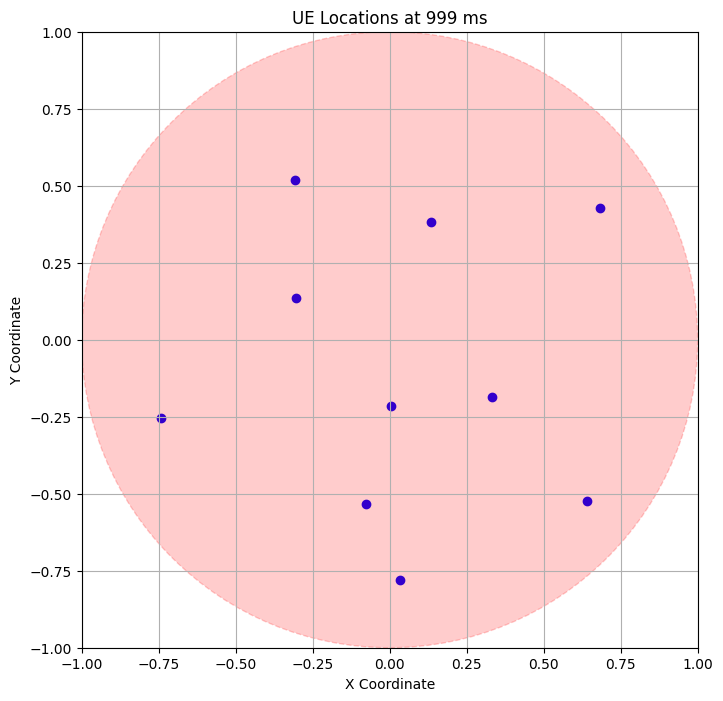

In [2]:
mobility_manager = TestMobilityManager()
mobility_manager.run()